# 단순 선형 회귀 구성 방법
## Linear Regression

iris 데이터 feature 4가지: sepal(꽃받침) length, sepal width, petal(꽃잎) length, petal width  
  
## 1조 GOAT  
예제: sepal length를 독립 변수로, petal length를 종속 변수로 사용  
상협: petal length를 독립 변수로, petal width를 종속 변수  
지윤: X -> petal width (cm) | y -> sepal width (cm)  
### 병준: sepal length를 독립 변수(X)로, sepal width를 종속 변수(y)로

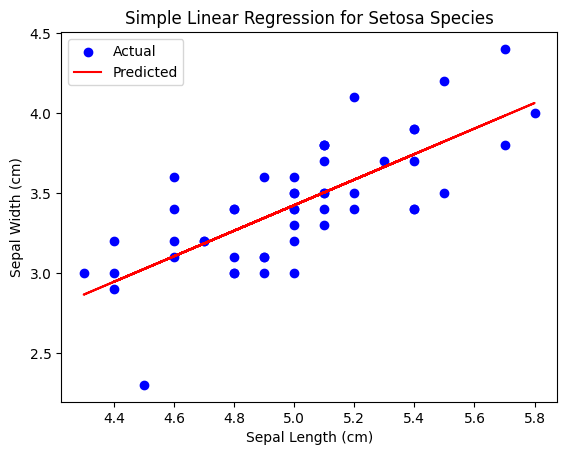

Coefficient: [0.7985283]
Intercept: -0.569432673039648


In [5]:
# 필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
import pandas as pd

# Iris 데이터셋 불러오기
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# 'setosa' 종만 선택
setosa_df = iris_df[iris_df['species'] == 'setosa']

# 독립 변수와 종속 변수 설정
X = setosa_df[['sepal length (cm)']]
y = setosa_df['sepal width (cm)']

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 결과 시각화
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Simple Linear Regression for Setosa Species')
plt.legend()
plt.show()

# 회귀 계수 및 절편 출력
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# 다선형 회귀 구성 방법
## Multiple Linear Regression

iris 데이터 feature 4가지: sepal(꽃받침) length, sepal width, petal(꽃잎) length, petal width  
  
## 1조 GOAT  
예제: sepal length와 sepal width를 독립 변수로, petal length와 petal width를 종속 변수로 사용  
상협: sepal length와 petal length를 독립 변수로, sepal width와 petal width를 종속 변수  
지윤: X -> petal width (cm), sepal width (cm) | y -> petal length (cm), sepal length (cm)
### 병준: sepal length와 petal width를 독립 변수(X)로, sepal width와 petal length를 종속 변수(y)로

In [6]:
# 필요한 라이브러리 불러오기
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
import pandas as pd

# Iris 데이터셋 불러오기
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# 독립 변수와 종속 변수 설정
X = iris_df[['sepal length (cm)', 'petal width (cm)']]
y = iris_df[['sepal width (cm)', 'petal length (cm)']]

# 다중 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 예측 결과를 DataFrame으로 변환
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted sepal width (cm)', 'Predicted petal length (cm)'])

# 실제 값과 예측 값 출력
print("Actual values:")
print(y.head())
print("\nPredicted values:")
print(y_pred_df.head())

# 회귀 계수 및 절편 출력
print(f"\nCoefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Actual values:
   sepal width (cm)  petal length (cm)
0               3.5                1.4
1               3.0                1.4
2               3.2                1.3
3               3.1                1.5
4               3.6                1.4

Predicted values:
   Predicted sepal width (cm)  Predicted petal length (cm)
0                    3.308400                     1.607986
1                    3.250543                     1.499535
2                    3.192686                     1.391084
3                    3.163757                     1.336858
4                    3.279472                     1.553760

Coefficients: [[ 0.28928673 -0.46641431]
 [ 0.54225562  1.74810286]]
Intercept: [ 1.92632078 -1.50713838]


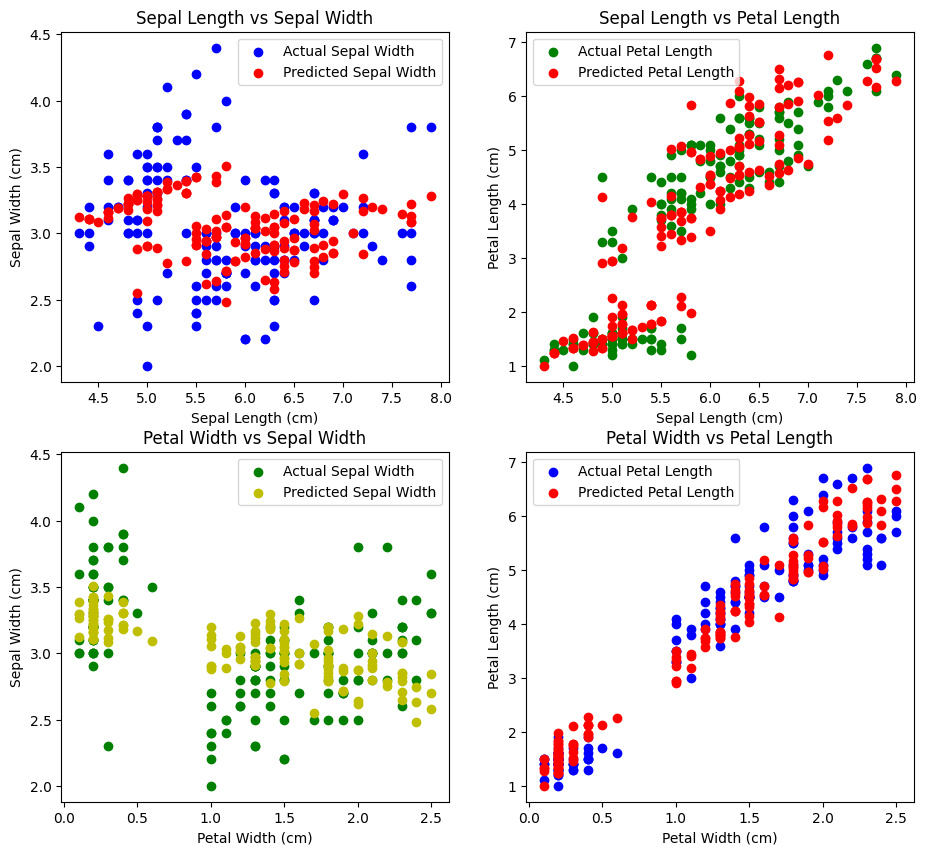

In [7]:
# 필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
import pandas as pd

# Iris 데이터셋 불러오기
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 독립 변수와 종속 변수 설정
X = iris_df[['sepal length (cm)', 'petal width (cm)']]
y = iris_df[['sepal width (cm)', 'petal length (cm)']]

# 다중 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 예측 결과를 DataFrame으로 변환
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted sepal width (cm)', 'Predicted petal length (cm)'])

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(11, 10))

# Sepal Length에 따른 Sepal Width
axes[0,0].scatter(X['sepal length (cm)'], y['sepal width (cm)'], color='b', label='Actual Sepal Width')
axes[0,0].scatter(X['sepal length (cm)'], y_pred_df['Predicted sepal width (cm)'], color='r', label='Predicted Sepal Width')
axes[0,0].set_title('Sepal Length vs Sepal Width')
axes[0,0].set_xlabel('Sepal Length (cm)')
axes[0,0].set_ylabel('Sepal Width (cm)')
axes[0,0].legend()

# Sepal Length에 따른 Petal Length
axes[0,1].scatter(X['sepal length (cm)'], y['petal length (cm)'], color='g', label='Actual Petal Length')
axes[0,1].scatter(X['sepal length (cm)'], y_pred_df['Predicted petal length (cm)'], color='r', label='Predicted Petal Length')
axes[0,1].set_title('Sepal Length vs Petal Length')
axes[0,1].set_xlabel('Sepal Length (cm)')
axes[0,1].set_ylabel('Petal Length (cm)')
axes[0,1].legend()

# Petal Width에 따른 Sepal Width
axes[1,0].scatter(X['petal width (cm)'], y['sepal width (cm)'], color='g', label='Actual Sepal Width')
axes[1,0].scatter(X['petal width (cm)'], y_pred_df['Predicted sepal width (cm)'], color='y', label='Predicted Sepal Width')
axes[1,0].set_title('Petal Width vs Sepal Width')
axes[1,0].set_xlabel('Petal Width (cm)')
axes[1,0].set_ylabel('Sepal Width (cm)')
axes[1,0].legend()

# Petal Width에 따른 Petal Length
axes[1,1].scatter(X['petal width (cm)'],y['petal length (cm)'], color='b', label='Actual Petal Length')
axes[1,1].scatter(X['petal width (cm)'], y_pred_df['Predicted petal length (cm)'], color='r', label='Predicted Petal Length')
axes[1,1].set_title('Petal Width vs Petal Length')
axes[1,1].set_xlabel('Petal Width (cm)')
axes[1,1].set_ylabel('Petal Length (cm)')
axes[1,1].legend()

plt.show()